In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_details.csv')

In [3]:
df.shape

(720, 4)

In [4]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


### EDA

In [6]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [7]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [8]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())
df['Rating']

0      4.2
1      4.2
2      4.3
3      4.4
4      4.4
      ... 
715    4.0
716    4.5
717    4.3
718    3.0
719    4.2
Name: Rating, Length: 720, dtype: float64

In [9]:
df.isnull().sum()

Product    0
Rating     0
MRP        0
Feature    0
dtype: int64

In [10]:
def clean_df(df):
    # Convert all string columns to lowercase
    df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
    
    # Remove special characters from all string columns
    df = df.applymap(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x)
    
    return df


In [11]:
df = clean_df(df)

In [12]:
df.head()

,Product,Rating,MRP,Feature
0,lenovo ideapad 3 core i3 11th gen 8 gb256 gb ...,4.2,36990,intel core i3 processor 11th gen8 gb ddr4 ram6...
1,lenovo ideapad 3 core i3 11th gen 8 gb512 gb ...,4.2,39990,intel core i3 processor 11th gen8 gb ddr4 ram6...
2,asus vivobook 15 2022 core i3 10th gen 8 gb51...,4.3,32990,intel core i3 processor 10th gen8 gb ddr4 ram6...
3,hp pavilion ryzen 5 hexa core amd r55600h 8 g...,4.4,49990,amd ryzen 5 hexa core processor8 gb ddr4 ram64...
4,asus tuf gaming f15 core i5 10th gen 8 gb512 ...,4.4,49990,intel core i5 processor 10th gen8 gb ddr4 ramw...


In [13]:
df['Feature']

0      intel core i3 processor 11th gen8 gb ddr4 ram6...
1      intel core i3 processor 11th gen8 gb ddr4 ram6...
2      intel core i3 processor 10th gen8 gb ddr4 ram6...
3      amd ryzen 5 hexa core processor8 gb ddr4 ram64...
4      intel core i5 processor 10th gen8 gb ddr4 ramw...
                             ...                        
715    intel celeron dual core processor4 gb lpddr4 r...
716    amd ryzen 7 octa core processor8 gb ddr4 ram64...
717    amd ryzen 9 octa core processor16 gb ddr5 ram6...
718    intel core i7 processor 12th gen16 gb lpddr5 r...
719    intel core i5 processor 10th gen8 gb ddr4 ram6...
Name: Feature, Length: 720, dtype: object

In [14]:
df.isnull().sum()

Product    0
Rating     0
MRP        0
Feature    0
dtype: int64

In [15]:
# extract RAM size and type
df['Ram_size'] = df['Feature'].str.extract(r'(\d+) gb')
df['Ram_type'] = df['Feature'].str.extract(r'(\bddr\d\b|\blpddr\d\b|\bddr\dL\b)')
df['Operating system'] = df['Feature'].str.extract(r'(windows\s\d{1,2}\s\w+\ssystem|\bmacos\b|\blinux\b)')
# df['Disk_type'] = df['Feature'].str.extract(r'(\bssd\d*|\bhdd\d*)')
df['Disk_type'] = df['Feature'].str.extract(r'(\bssd.{0,0}|\bhdd.{0,0})')
df['Disk_size'] = df['Feature'].str.extract(r'(\d+\s*[t|g]b)')

df.head()

,Product,Rating,MRP,Feature,Ram_size,Ram_type,Operating system,Disk_type,Disk_size
0,lenovo ideapad 3 core i3 11th gen 8 gb256 gb ...,4.2,36990,intel core i3 processor 11th gen8 gb ddr4 ram6...,8,ddr4,windows 11 operating system,ssd,8 gb
1,lenovo ideapad 3 core i3 11th gen 8 gb512 gb ...,4.2,39990,intel core i3 processor 11th gen8 gb ddr4 ram6...,8,ddr4,windows 11 operating system,ssd,8 gb
2,asus vivobook 15 2022 core i3 10th gen 8 gb51...,4.3,32990,intel core i3 processor 10th gen8 gb ddr4 ram6...,8,ddr4,windows 11 operating system,ssd,8 gb
3,hp pavilion ryzen 5 hexa core amd r55600h 8 g...,4.4,49990,amd ryzen 5 hexa core processor8 gb ddr4 ram64...,8,ddr4,windows 10 operating system,ssd,8 gb
4,asus tuf gaming f15 core i5 10th gen 8 gb512 ...,4.4,49990,intel core i5 processor 10th gen8 gb ddr4 ramw...,8,ddr4,windows 11 operating system,ssd,8 gb


In [16]:
df.isnull().sum()

Product              0
Rating               0
MRP                  0
Feature              0
Ram_size             0
Ram_type            49
Operating system    30
Disk_type           10
Disk_size            0
dtype: int64

In [17]:
df.dropna(subset=['Ram_type'], inplace=True)
df.dropna(subset=['Operating system'], inplace=True)
df.dropna(subset=['Disk_type'], inplace=True)


In [18]:
df.isnull().sum()

Product             0
Rating              0
MRP                 0
Feature             0
Ram_size            0
Ram_type            0
Operating system    0
Disk_type           0
Disk_size           0
dtype: int64

In [19]:
df['Feature'][0]

'intel core i3 processor 11th gen8 gb ddr4 ram64 bit windows 11 operating system256 gb ssd3556 cm 14 inch displayoffice home and student 20212 year onsitewarranty'

In [20]:
df['Disk_type'].unique()

array(['ssd', 'hdd'], dtype=object)

In [21]:
df.drop('Feature', axis=1, inplace=True)

In [22]:
df.head()

,Product,Rating,MRP,Ram_size,Ram_type,Operating system,Disk_type,Disk_size
0,lenovo ideapad 3 core i3 11th gen 8 gb256 gb ...,4.2,36990,8,ddr4,windows 11 operating system,ssd,8 gb
1,lenovo ideapad 3 core i3 11th gen 8 gb512 gb ...,4.2,39990,8,ddr4,windows 11 operating system,ssd,8 gb
2,asus vivobook 15 2022 core i3 10th gen 8 gb51...,4.3,32990,8,ddr4,windows 11 operating system,ssd,8 gb
3,hp pavilion ryzen 5 hexa core amd r55600h 8 g...,4.4,49990,8,ddr4,windows 10 operating system,ssd,8 gb
4,asus tuf gaming f15 core i5 10th gen 8 gb512 ...,4.4,49990,8,ddr4,windows 11 operating system,ssd,8 gb


### Split Product name into Brand name

In [23]:
df['Brand Name'] = df['Product'].str.split(' ', 1).str[0]


C:\Users\patel\AppData\Local\Temp\ipykernel_11872\483019674.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Brand Name'] = df['Product'].str.split(' ', 1).str[0]


In [24]:
df['Brand Name'].unique()

array(['lenovo', 'asus', 'hp', 'dell', 'redmibook', 'realme', 'acer',
       'msi', 'vaio', 'gigabyte', 'nokia', 'ultimus', 'alienware'],
      dtype=object)

In [25]:
df['Ram_type'].unique()

array(['ddr4', 'ddr5', 'lpddr5', 'lpddr4', 'lpddr3'], dtype=object)

In [26]:
df['Operating system'].unique()

array(['windows 11 operating system', 'windows 10 operating system'],
      dtype=object)

In [27]:
df['Disk_size'].unique()

array(['8 gb', '8gb', '16 gb', '4 gb', '16gb', '32 gb', '128 gb'],
      dtype=object)

In [28]:
df['Disk_size'] = df['Disk_size'].replace('8gb', '8 gb')
df['Disk_size'] = df['Disk_size'].replace('16gb', '16 gb')

In [29]:
df['Disk_size'].unique()

array(['8 gb', '16 gb', '4 gb', '32 gb', '128 gb'], dtype=object)

In [30]:
df['Disk_type'].unique()

array(['ssd', 'hdd'], dtype=object)

In [31]:
df.head()

,Product,Rating,MRP,Ram_size,Ram_type,Operating system,Disk_type,Disk_size,Brand Name
0,lenovo ideapad 3 core i3 11th gen 8 gb256 gb ...,4.2,36990,8,ddr4,windows 11 operating system,ssd,8 gb,lenovo
1,lenovo ideapad 3 core i3 11th gen 8 gb512 gb ...,4.2,39990,8,ddr4,windows 11 operating system,ssd,8 gb,lenovo
2,asus vivobook 15 2022 core i3 10th gen 8 gb51...,4.3,32990,8,ddr4,windows 11 operating system,ssd,8 gb,asus
3,hp pavilion ryzen 5 hexa core amd r55600h 8 g...,4.4,49990,8,ddr4,windows 10 operating system,ssd,8 gb,hp
4,asus tuf gaming f15 core i5 10th gen 8 gb512 ...,4.4,49990,8,ddr4,windows 11 operating system,ssd,8 gb,asus


### Feature Selection

C:\Users\patel\AppData\Local\Temp\ipykernel_11872\4000098576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numerical_cols].corr()


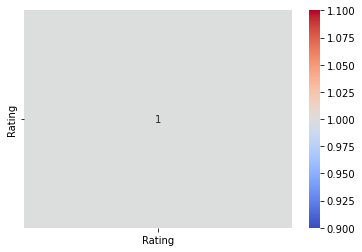

In [32]:
numerical_cols = ['Rating', 'MRP', 'Ram_size']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
df.drop('Product', axis=1, inplace=True)

df.head()

,Rating,MRP,Ram_size,Ram_type,Operating system,Disk_type,Disk_size,Brand Name
0,4.2,36990,8,ddr4,windows 11 operating system,ssd,8 gb,lenovo
1,4.2,39990,8,ddr4,windows 11 operating system,ssd,8 gb,lenovo
2,4.3,32990,8,ddr4,windows 11 operating system,ssd,8 gb,asus
3,4.4,49990,8,ddr4,windows 10 operating system,ssd,8 gb,hp
4,4.4,49990,8,ddr4,windows 11 operating system,ssd,8 gb,asus


In [34]:
df['Brand Name']

0      lenovo
1      lenovo
2        asus
3          hp
4        asus
        ...  
714        hp
716    lenovo
717      asus
718      asus
719    lenovo
Name: Brand Name, Length: 652, dtype: object

In [35]:
last_col = df.pop(df.columns[-1])

# Insert the last column at the first position
df.insert(0, last_col.name, last_col)

# View the modified dataframe
df.head()

,Brand Name,Rating,MRP,Ram_size,Ram_type,Operating system,Disk_type,Disk_size
0,lenovo,4.2,36990,8,ddr4,windows 11 operating system,ssd,8 gb
1,lenovo,4.2,39990,8,ddr4,windows 11 operating system,ssd,8 gb
2,asus,4.3,32990,8,ddr4,windows 11 operating system,ssd,8 gb
3,hp,4.4,49990,8,ddr4,windows 10 operating system,ssd,8 gb
4,asus,4.4,49990,8,ddr4,windows 11 operating system,ssd,8 gb


In [36]:
df.columns

Index(['Brand Name', 'Rating', 'MRP', 'Ram_size', 'Ram_type',
       'Operating system', 'Disk_type', 'Disk_size'],
      dtype='object')

### Model Create

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Brand Name"]=le.fit_transform(df["Brand Name"])
df["Ram_size"]=le.fit_transform(df["Ram_size"])
df["Ram_type"]=le.fit_transform(df["Ram_type"])
df["Operating system"]=le.fit_transform(df["Operating system"])
df["Disk_type"]=le.fit_transform(df["Disk_type"])
df["Disk_size"]=le.fit_transform(df["Disk_size"])


In [38]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# define the features and target variables
X = df[['Rating', 'Brand Name', 'Ram_size', 'Ram_type', 'Operating system', 'Disk_type', 'Disk_size']]
y = df['MRP']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize a Random Forest Regressor with default parameters
rf_regressor = RandomForestRegressor(random_state=42)

# fit the model to the training data
rf_regressor.fit(X_train, y_train)

# evaluate the model on the test data
y_pred = rf_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2)
print('Mean squared error:', mse)


R2 score: 0.8244121744486517
Mean squared error: 607024177.6293772


In [40]:
df.head()

,Brand Name,Rating,MRP,Ram_size,Ram_type,Operating system,Disk_type,Disk_size
0,6,4.2,36990,4,0,1,1,4
1,6,4.2,39990,4,0,1,1,4
2,2,4.3,32990,4,0,1,1,4
3,5,4.4,49990,4,0,0,1,4
4,2,4.4,49990,4,0,1,1,4


In [41]:
df['Disk_size'].unique()

array([4, 1, 3, 2, 0])

In [39]:
df.to_csv("laptop_details_eda.csv", index=False)